# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           6.69e-34
Time:                        13:58:37   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

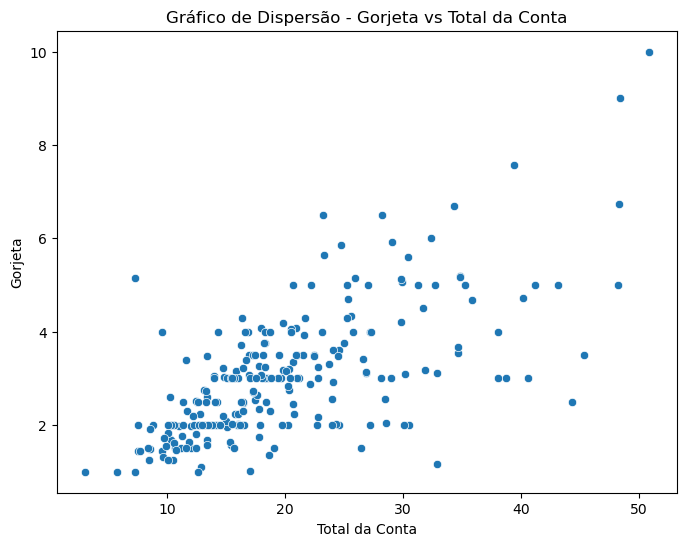

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carregando a base de dados de gorjetas
tips = sns.load_dataset('tips')
# Criando as variáveis tip (gorjeta) e total_bill (total da conta)
tip = tips['tip']
total_bill = tips['total_bill']
# Adicionando uma constante à variável independente para a regressão
total_bill = sm.add_constant(total_bill)
# Realizando a regressão de tip explicada por total_bill
modelo = sm.OLS(tip, total_bill).fit()
print(modelo.summary())

# Plotando o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Gráfico de Dispersão - Gorjeta vs Total da Conta')
plt.xlabel('Total da Conta')
plt.ylabel('Gorjeta')
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.21e-12
Time:                        13:58:37   Log-Likelihood:                 361.93
No. Observations:                 244   AIC:                            -719.9
Df Residuals:                     242   BIC:                            -712.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2162      0.008     26.401      0.0

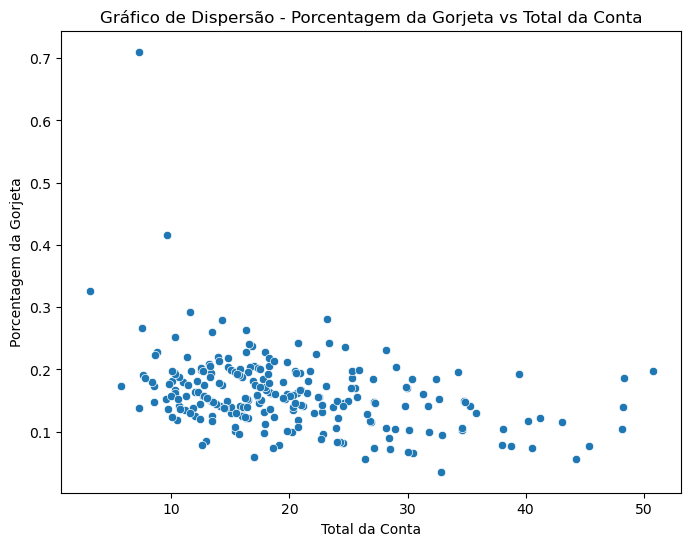

In [2]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
# Criando as variáveis net_bill e tip_pct
net_bill = tips['total_bill'] - tips['tip']
tip_pct = tips['tip_pct']
# Adicionando uma constante à variável independente para a regressão
net_bill = sm.add_constant(net_bill)
# Realizando a regressão de tip_pct explicada por net_bill
modelo = sm.OLS(tip_pct, net_bill).fit()
print(modelo.summary())
# Plotando o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip_pct', data=tips)
plt.title('Gráfico de Dispersão - Porcentagem da Gorjeta vs Total da Conta')
plt.xlabel('Total da Conta')
plt.ylabel('Porcentagem da Gorjeta')
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

- Relação mais forte e direta entre as duas variáveis, refletida em um R² maior, o gráfico de dispersão mostra uma tendência clara de aumento da gorjeta com o aumento do total da conta.
- A relação é mais fraca e menos direta, refletida em um R² menor, o gráfico de dispersão mostra uma distribuição menos uniforme dos pontos em torno da média, indicando uma relação menos linear entre as variáveis.

É possível comparar diretamente os valores de R² entre os modelos, eles representam diferentes aspectos da relação entre as variáveis, porém, podem não ser diretamente comparáveis em termos de qualidade do ajuste.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [3]:
#1.
pred_tip_pct = modelo.fittedvalues
pred_tip_pct

0      0.163469
1      0.187573
2      0.158418
3      0.148974
4      0.146960
         ...   
239    0.139927
240    0.133092
241    0.147984
242    0.163172
243    0.164130
Length: 244, dtype: float64

In [4]:
#2.
pred_tip = pred_tip_pct * net_bill.iloc[:, 1]
pred_tip

0      2.612241
1      1.628133
2      2.773891
3      3.034605
4      3.083222
         ...   
239    3.233715
240    3.351263
241    3.058822
242    2.622177
243    2.589967
Length: 244, dtype: float64

In [5]:
#3. 
residuals_tip = tip - pred_tip
SSR_tip = residuals_tip.pow(2).sum()
SST_tip = (tip - tip.mean()).pow(2).sum()
R_squared_tip = 1 - (SSR_tip / SST_tip)
print("R² do modelo para tip:", R_squared_tip)

R² do modelo para tip: 0.15088205148178946


In [6]:
#4. 
R_squared_tip_item1 = modelo.rsquared

# Exibindo os valores de R² para comparação
print("R² do modelo para tip (Item 1):", R_squared_tip_item1)
print("R² do modelo para tip (Item 3):", R_squared_tip)

R² do modelo para tip (Item 1): 0.18859378734977417
R² do modelo para tip (Item 3): 0.15088205148178946


O modelo do item 1, que relaciona diretamente a gorjeta ao total da conta, possui um ajuste ligeiramente melhor em explicar a variação da gorjeta em comparação com o modelo do item 3, que considera a porcentagem da gorjeta em relação ao total da conta líquido.